In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings

In [70]:
df = pd.read_csv('data/raw.csv')


In [71]:
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
368,female,group A,some high school,free/reduced,none,44,64,58
899,female,group D,some high school,standard,completed,65,78,82
157,male,group B,some college,free/reduced,none,60,60,60
842,female,group B,high school,free/reduced,completed,23,44,36
224,female,group B,associate's degree,standard,completed,52,66,73


In [72]:
x = df.drop(columns=['math_score'])


In [73]:
x.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
512,male,group D,some high school,free/reduced,none,49,52
206,male,group E,bachelor's degree,standard,none,62,62
242,female,group D,high school,standard,none,52,55
786,female,group E,some high school,free/reduced,none,79,77
693,female,group D,associate's degree,standard,none,77,73


In [74]:
print("Categories in 'gender' variable: {}".format(df['gender'].unique()))

print("Categories in 'race_ethnicity' variable: {}".format(df['race_ethnicity'].unique()))

print("Categories in'parental level of education' variable: {}".format(df['parental_level_of_education'].unique()))

print("Categories in 'lunch' variable: {}".format(df['lunch'].unique()))

print("Categories in 'test preparation course' variable: {}".format(df['test_preparation_course'].unique()))

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [75]:
y = df['math_score']

In [76]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [77]:
cat_col = [col for col in x.columns if x[col].dtype=='O']
num_col = [col for col in x.columns if x[col].dtype!='O']
num_col

['reading_score', 'writing_score']

In [78]:
preprocessor = ColumnTransformer([
    ('one',OneHotEncoder(),cat_col),
    ('two',StandardScaler(),num_col)
], remainder='passthrough')

In [79]:
x = preprocessor.fit_transform(x)

In [80]:
x.shape

(1000, 19)

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)

In [82]:
x_test.shape

(200, 19)

In [83]:
def evalution(actual,predicted):
    mae= mean_absolute_error(actual,predicted)
    mse= mean_squared_error(actual,predicted)
    rmse= np.sqrt(mse) 
    R2_score = r2_score(actual,predicted)
    return mae,rmse,R2_score

In [84]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [85]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pre = model.predict(x_train)
    y_test_pre = model.predict(x_test)

    model_train_mae,model_train_rmse,model_train_r2_score = evalution(y_train,y_train_pre)
    model_test_mae,model_test_rmse,model_test_r2_score = evalution(y_test,y_test_pre)

    model_list.append(list(models.keys())[i])
    r2_list.append(round(model_test_r2_score,3))

    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {}".format(round(model_train_rmse,2)))
    print("- Mean Absolute Error: {}".format(round(model_train_mae,2)))
    print("- R2 Score: {}".format(round(model_train_r2_score,2)))

    print('-'*35)
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {}".format(round(model_test_rmse,2)))
    print("- Mean Absolute Error: {}".format(round(model_test_mae,2)))
    print("- R2 Score: {}".format(round(model_test_r2_score,2)))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.27
- Mean Absolute Error: 4.22
- R2 Score: 0.88
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.58
- Mean Absolute Error: 4.38
- R2 Score: 0.84


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.48
- Mean Absolute Error: 5.13
- R2 Score: 0.82
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.34
- Mean Absolute Error: 4.95
- R2 Score: 0.8


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.27
- Mean Absolute Error: 4.22
- R2 Score: 0.88
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.58
- Mean Absolute Error: 4.38
- R2 Score: 0.84


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.85
- Mean Absolute Error: 4.65
- R2 Score: 0.86
-----------------------------------
Model performance for Test 

In [86]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','r2_score']).sort_values(by=['r2_score'],ascending=False)

,Model,r2_score
2,Ridge,0.845
0,Linear Regression,0.844
7,CatBoosting Regressor,0.828
8,AdaBoost Regressor,0.810
1,Lasso,0.799
5,Random Forest Regressor,0.797
6,XGBRegressor,0.766
3,K-Neighbors Regressor,0.747
4,Decision Tree,0.606


In [87]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 84.44


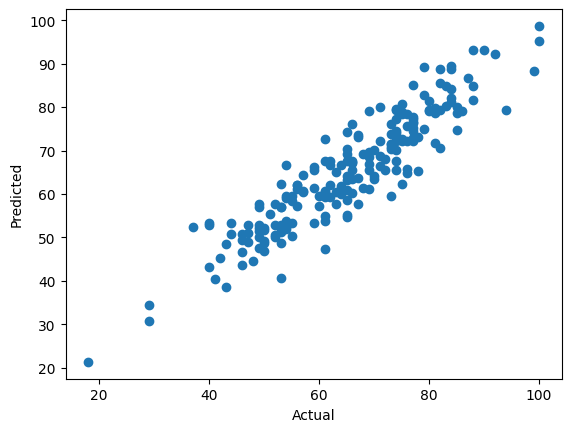

In [88]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

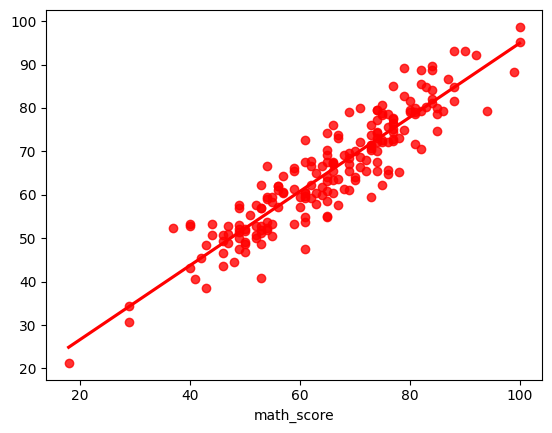

In [89]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [90]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df.sort_values(by=['Difference'])

,Actual Value,Predicted Value,Difference
455,37,52.273227,-15.273227
575,40,53.231184,-13.231184
11,40,52.863493,-12.863493
887,54,66.713781,-12.713781
817,61,72.606663,-11.606663
...,...,...,...
464,75,62.281728,12.718272
199,78,65.225124,12.774876
279,73,59.474935,13.525065
830,61,47.403710,13.596290


In [91]:
r_model = Ridge()
r_model = r_model.fit(x_train, y_train)
y_pre = r_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 84.44


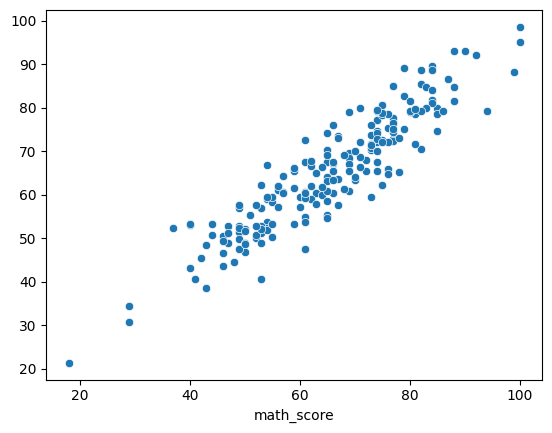

In [92]:
sns.scatterplot(x=y_test, y = y_pre)
plt.show()

Text(0.5, 1.0, 'Linear Regression')

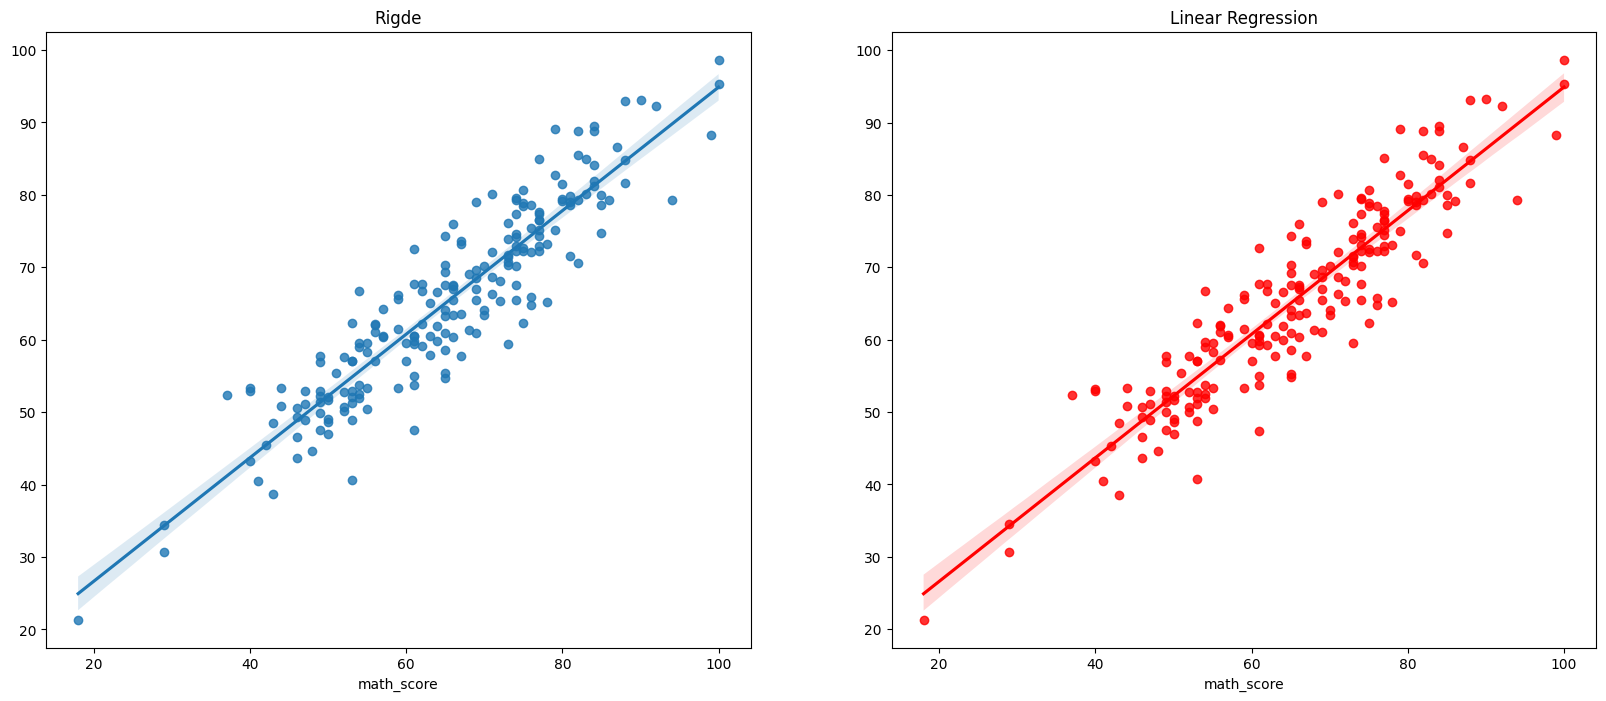

In [93]:
fig,axs = plt.subplots(1,2,figsize=(20,8))
plt.subplot(1,2,1)
sns.regplot(x=y_test,y=y_pre)
plt.title("Rigde")
plt.subplot(1,2,2)
sns.regplot(x=y_test,y=y_pred,color='r')
plt.title("Linear Regression")

In [94]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pre,'Difference':y_test-y_pred})
pred_df.sort_values(by=['Difference'])

,Actual Value,Predicted Value,Difference
455,37,52.350683,-15.273227
575,40,53.278909,-13.231184
11,40,52.958267,-12.863493
887,54,66.747596,-12.713781
817,61,72.571204,-11.606663
...,...,...,...
464,75,62.308682,12.718272
199,78,65.255537,12.774876
279,73,59.438030,13.525065
830,61,47.466046,13.596290
